# §2. 線形回帰・単回帰モデル

今回は、線形回帰・単回帰モデルについて学習していきます。

## 1. 線形回帰・単回帰モデルについて

### 1.1. 線形回帰・単回帰モデルとは？

線形回帰・単回帰モデルとは、あるデータ$x$から対象$y$を予測することです。数式で表すと、以下のようになります。

$$y = w_0 + w_1 x_1$$

よく見ると、中学生のときに習った一次関数$y = ax + b$の形をしていますよね。つまり、線形回帰・単回帰モデルとは、**直線を使って変数$x$から対象$y$を予測すること**です。

たとえば、$x$と$y$を以下のようにしましょう。

- $x$ : 気温
- $y$ : アイスクリームの売上

具体的な数字も、仮で作成してみました。

<table border="1">
    <tr>
      <th>気温</th>
      <th>アイスクリームの売上</th>
    </tr>
    <tr>
      <td>28</td>
      <td>10</td>
    </tr>
    <tr>
      <td>26</td>
      <td>9</td>
    </tr>
    <tr>
      <td>20</td>
      <td>4</td>
    </tr>
    <tr>
      <td>24</td>
      <td>7</td>
    </tr>
    <tr>
      <td>22</td>
      <td>5</td>
    </tr>
</table>

上記の表に入っているデータを実際に可視化してみると、なんとなく"右肩上がりの直線"が引けそうですよね。

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

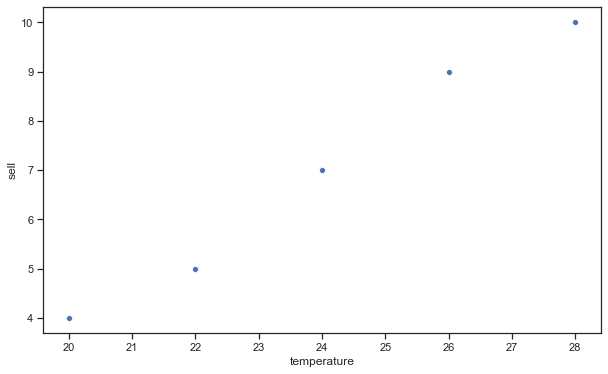

In [43]:
df = pd.DataFrame({'temperature':[28, 26, 20, 24, 22], 'sell':[10, 9, 4, 7, 5]})

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.temperature, y=df.sell)
plt.show()

これを**直線を使って予測するのが、単回帰モデル**です。

実際には完璧に直線で表すことはできないので、**各点からなるべく近い位置を通る直線**を引くことになります。

そして、各点からなるべく近い位置を通る直線を求めるのに必要なアクションは、**『$y = w_0 + w_1 x_1$の$w_0$と$w_1$を求めること』**です。

### 1.2. 線形回帰の「線形」とは？

今回学習する単回帰モデルや、次回扱っていく重回帰モデルは「線形」です。

たとえば、以下で表される数式も「線形」です。

$$y = \sum_{i=1}^{n} w_i x_i$$

$\sum$ はシグマといって、"足し合わせる"という意味の記号です。

なので、シグマを外すと、以下のような式になります。

$$y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n  \tag{1}$$

そして、この式の$n = 2$ で $x_1 = 1$ の場合が「単回帰モデル」の式になります。

「線形」の細かい定義は少し難しいので省略してOKです。ざっくりしたイメージでいうと、**単回帰モデルを含む、式(1)の形で表せる数式は線形**になります。

### 1.3. 式(1)が線形になる理由

*少し難しいので、スキップしても大丈夫な部分です。*

「線形」の定義は、以下を満たす数式になります。

- ①$f(x+y)=f(x)+f(y)$
- ②$f(kx)=kf(x)$　($k$:実数)

上記を満たす場合、その数式を線形と呼びます。

さっそく、$f(x) = \displaystyle \sum_{i=1}^{n} w_i x_i$が線形になるのか確認してみます。

####  ①$f(x+y)=f(x)+f(y)$の場合：

$$
\begin{eqnarray}
f(x + y) &=&  w_1 (x_1 + y_1) + w_2 (x_2 + y_2) + \cdots + w_n (x_n + y_n)\\
&=& w_1 x_1 + w_1 y_1 + w_2 x_2 + w_2 y_2 + \cdots + w_n x_n + w_n y_n\\
&=& (w_1 x_1 + w_2 x_2 + \cdots + w_n x_n) + (w_1 y_1 + w_2 y_2 + \cdots  + w_n y_n)\\
&=&f(x) + f(y)
\end{eqnarray}
$$

上記のように式展開してあげれば、①の条件が成り立ちますね。

####  ②$f(kx)=kf(x)$　($k$:実数)の場合：

$$
\begin{eqnarray}
f(kx) &=& w_1 (k x_1) + w_2 (k x_2) + \cdots + w_n (k x_n)\\
&=& k w_1  x_1 + k w_2  x_2 + \cdots + k w_n  x_n\\
&=& k(w_1 x_1 + w_2 x_2 + \cdots + w_n x_n )\\
&=& kf(x)
\end{eqnarray}
$$

こちらも同様に、丁寧な式展開をすれば、条件②を満たしていることが分かります。

なので、単回帰モデルを含む$f(x) = \displaystyle \sum_{i=1}^{n} w_i x_i$は、線形になります。

*※ちなみに、単回帰モデルは$n=2$の場合ですが、$n \geq 3$の場合を重回帰モデルと言います。
詳細は次回解説しますが、上の照明により重回帰モデルも線形になります。*

## 2. 線形回帰・単回帰モデルの実装

単回帰モデルの概要が分かったところで、さっそく実装をしていきましょう。

実装は以下の手順で進めていきます。

- STEP① : ライブラリの読み込み
- STEP② : データの読み込み
- STEP③ : データの準備
- STEP④ : 単回帰モデルの作成と評価

### 2.1 ライブラリの読み込み

今回必要になるライブラリをインポートします。

- numpy : 配列計算用ライブラリ
- pandas : データ操作用ライブラリ
- scikit-learn(sklearn) : データの準備・機械学習モデルの作成用ライブラリ
- matplotlib : 作図用ライブラリ①
- seaborn : 作図用ライブラリ②

In [12]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("ticks")

%matplotlib inline

### 2.2 データの読み込み

今回は、「ボストンの住宅価格」を使って、単回帰モデルの実装をおこなっていきます。

データの中身は、以下の表のとおりです。

<table style="border-collapse: collapse; width: 100%;" border="1">
<tbody>
<tr>
<td style="width: 38.9855%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">変数名</span></strong></span></td>
<td style="width: 61.0145%; background-color: #28467a; text-align: center;"><span style="font-size: 14px;"><strong><span style="color: #ffffff;">データの説明</span></strong></span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CRIM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">犯罪発生率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">ZN</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居区画の密集度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">INDUS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">非小売業の土地割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">CHAS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">チャールズ川の周辺か否か</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">NOX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">NOx濃度</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RM</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">住居に含まれる平均部屋数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">AGE</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1940年より前に建てられた物件の割合</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">DIS</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">ボストン市の5つの雇用施設からの重み付き距離</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">RAD</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">大きな道路へのアクセスのしやすさ</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">TAX</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">1万ドルあたりの不動産税率の総計</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">PTRATIO</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">教師あたりの生徒数</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">B</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">対象地域に住む黒人の比率</span></td>
</tr>
<tr>
<td style="width: 38.9855%; text-align: center;"><span style="font-size: 14px;">LSTAT</span></td>
<td style="width: 61.0145%; text-align: center;"><span style="font-size: 14px;">低所得者の割合</span></td>
</tr>
</tbody>
</table>

上記の表に入っているデータを使って、住宅価格=MEDVを予測します。

In [14]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


今回は、数ある変数の中から、RM(=住宅に含まれる平均部屋数)を使って、MEDV(=住宅価格)を予測しましょう。

散布図を使って可視化しておくと、以下のようになります。

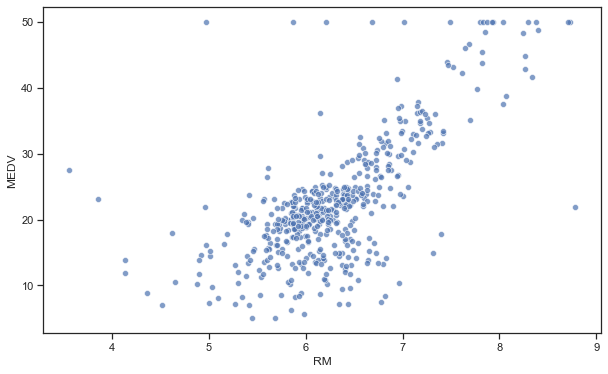

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.RM, y=df.MEDV, alpha=0.7)
plt.show()

こんな感じですね。直線でもうまく予測できていそうですが、「若干捉えきれていないかな」といった印象です。

図の真ん中にデータが集中しており、なんとなく単回帰モデルを使って予測できそうですよね。

### 2.3 データの準備

それでは、単回帰モデルの実装で必要なデータの準備をしていきます。

特徴量(=機械学習で使う変数)はRM、予測対象はMEDVですね。

In [16]:
x = df['RM']
X = np.array(x).reshape(-1, 1)
y = df['MEDV']

print('-'*10 + '特徴量とターゲットに分割' + '-'*10)
print('X:', X.shape)
print('y:', y.shape)

----------特徴量とターゲットに分割----------
X: (506, 1)
y: (506,)


特徴量とターゲットの組み合わせを、Scikit-learnに含まれている`train_test_split()`を使って学習用データとテスト用データに分割します。

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

元々506行あったデータを、学習:テスト = 8:2で分割したので、以下のデータ数になります。
- 学習用データ : 404
- テスト用データ : 102

In [23]:
print('元データ', X.shape)
print('学習用データ', X_train.shape)
print('テスト用データ', X_test.shape)

元データ (506, 1)
学習用データ (404, 1)
テスト用データ (102, 1)


### 2.4 単回帰モデルの作成と評価

単回帰モデルを使うには、`LinearRegression()`を使います。

そして、モデルの学習は`lm.fit()`を使うだけです。

In [27]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

これで単回帰モデルの作成が完了しました。

あとは、学習結果を見てみましょう。`lm.score()`を使えばモデルの決定係数を確認できます。

In [29]:
print('Train Score：{:.2f}' .format(lm.score(X_train, y_train)))
print('Test Score：{:.2f}' .format(lm.score(X_test, y_test)))

Train Score：0.50
Test Score：0.42


決定係数は、0〜1の値を取り、1に近い方が精度が良いという解釈になります。

なので、今回作成したモデルは、そこまで良いモデルだとは言えないですね。

ちなみに、**「良い単回帰モデルを作成する」とは、単回帰式$y = w_0 + w_1 x_1$に含まれる、$w_0$と$w_1$で最適な値を求めること**になります。

つまり、**Scikit-learnを使って単回帰モデルを作成すると、$w_0$と$w_1$が求まっています。**

*※ライブラリを使って計算しているので中身は見えませんが、実は色々なロジックに基づいて最適な$w_0$と$w_1$を計算しています。*

実際に中身を確認してみると、以下のとおりです。

In [32]:
print('バイアス', lm.intercept_)
print('重み', lm.coef_)

バイアス -36.47618962764734
重み [9.37638431]


バイアスと呼んでいるのが、$w_0$、重みと呼んでいるのが$w_1$です。

数式で表すと、以下のようなモデルが完成したことになります。

$$y =  -36.476 + 9.3764 x$$

### 2.5 学習結果の可視化

元データと、今回作成した単回帰モデルの予測結果を確認してみます。


In [35]:
y_pred = lm.predict(X_test)

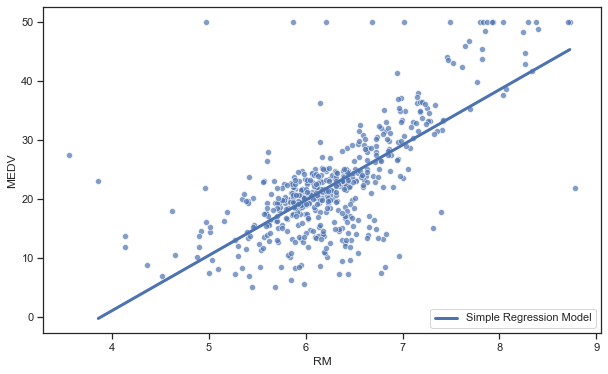

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(X.reshape(len(X), ), y, alpha=0.7)
sns.lineplot(x=X_test.reshape(len(X_test), ), y=y_pred, linewidth=3, label='Simple Regression Model')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

だいたい予測できていますが、中には全く予測できていないデータもありますね。

このように、単回帰モデルはシンプルかつ直感的に分かりやすいモデルではありますが、そこまで正確に予測できるモデルではありません。



In [42]:
#notebookをpythonファイルに変換
# ! jupyter nbconvert --to script ml02_linear_regression.ipynb

[NbConvertApp] Converting notebook ml02_linear_regression.ipynb to script
[NbConvertApp] Writing 9688 bytes to ml02_linear_regression.py
